#Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time

**Reading DataSet**

Data Cleaning, Statistical Summary, Checking Missing Data and Outliers


In [36]:
URL = 'https://raw.githubusercontent.com/patilAdesh/Human_Stress_Detection_In_and_Through_Sleep/main/dataset.csv'
df = pd.read_csv(URL)
df.sample(10)
df.shape
df.head()
df.describe().T
df.isna().sum().sort_values()
df.columns

Index(['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
       'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate',
       'stress_level'],
      dtype='object')

**Plotting Box Plot**

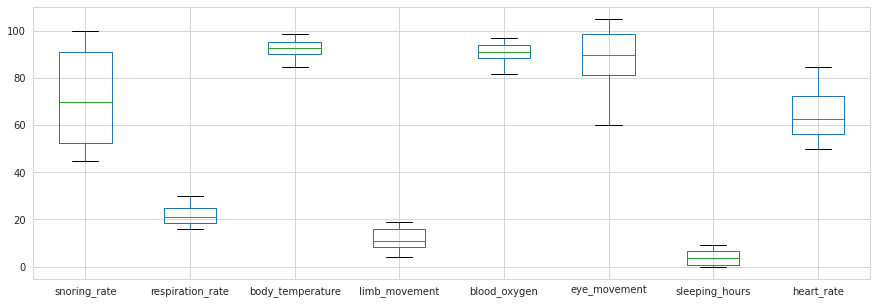

In [37]:
boxplot = df.boxplot(column=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
       'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate'],figsize=(15,5))

**Plotting Hist Plot**

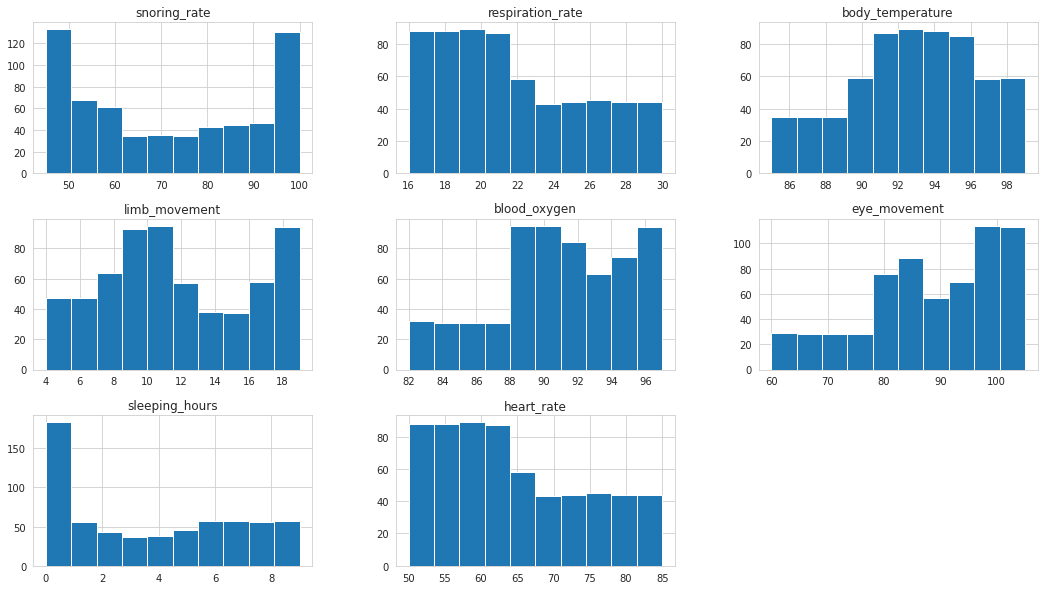

In [38]:
histplot = df.hist(column=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
       'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate'],figsize=(18,10))

**Checking Duplicates**

In [39]:
df.duplicated().sum()
#we don't have duplicates in the dataset, yet check it

0

**EDA (Exploratoray Data Analysis)**

**Feature Scaling**

In [40]:
#importing library 
from sklearn.preprocessing import MinMaxScaler
#Defining varible
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df[['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
       'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate']])
print(scaled)

[[0.88727273 0.69142857 0.48857143 ... 0.88       0.20444444 0.69142857]
 [0.848      0.65028571 0.468      ... 0.864      0.17244444 0.65028571]
 [0.27272727 0.28571429 0.78571429 ... 0.55555556 0.77777778 0.28571429]
 ...
 [0.95461818 0.82171429 0.13428571 ... 0.93066667 0.         0.82171429]
 [0.248      0.26628571 0.76628571 ... 0.54044444 0.74755556 0.26628571]
 [0.52581818 0.38514286 0.59942857 ... 0.71022222 0.45422222 0.38514286]]


In [41]:
newdf = pd.DataFrame(scaled, columns =['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
       'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate'])
newdf.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143


In [42]:
newdf['stress_level']=df['stress_level']
newdf

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0
...,...,...,...,...,...,...,...,...,...
625,0.447273,0.354286,0.568571,0.464000,0.597333,0.662222,0.382222,0.354286,2
626,0.062545,0.098286,0.933143,0.183467,0.958400,0.305778,0.930667,0.098286,0
627,0.954618,0.821714,0.134286,0.916800,0.150400,0.930667,0.000000,0.821714,4
628,0.248000,0.266286,0.766286,0.381867,0.839467,0.540444,0.747556,0.266286,1


**Statistical Summary (post-normalization)**

In [43]:
newdf.describe()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,0.483636,0.414286,0.557143,0.513333,0.593333,0.633333,0.411111,0.414286,2.000000
std,0.352233,0.283294,0.252121,0.286642,0.260166,0.264305,0.339397,0.283294,1.415337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.136364,0.178571,0.392857,0.300000,0.433333,0.472222,0.055556,0.178571,1.000000
50%,0.454545,0.357143,0.571429,0.466667,0.600000,0.666667,0.388889,0.357143,2.000000
75%,0.840909,0.642857,0.750000,0.783333,0.816667,0.861111,0.722222,0.642857,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [44]:
newdf['stress_level'].value_counts().sort_values()
#The data is equally distributed among all the stress levels

3    126
1    126
0    126
2    126
4    126
Name: stress_level, dtype: int64

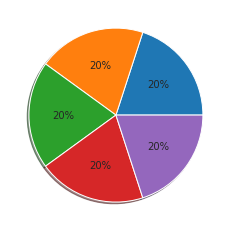

In [45]:
#plotting a pie chart to show the distribution of data
label = ['low','high']
ex=[0.1,0,0,0,0.1]
plt.pie(newdf['stress_level'].value_counts(),autopct='%.0f%%',shadow=True)
plt.show()

**Checking for correlation**

In [46]:
newdf.corrwith(newdf['stress_level'], method = 'pearson')

snoring_rate        0.975322
respiration_rate    0.963516
body_temperature   -0.962354
limb_movement       0.971071
blood_oxygen       -0.961092
eye_movement        0.951988
sleeping_hours     -0.973036
heart_rate          0.963516
stress_level        1.000000
dtype: float64

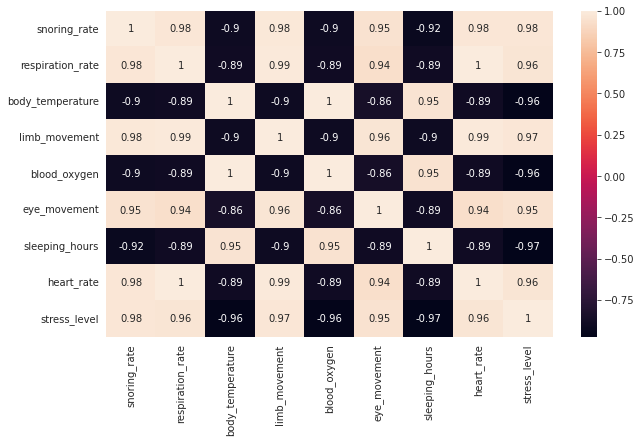

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(newdf.corr(),annot=True)
#All the features have high correlation with the target variable.

#Model Training

**Importing the Models**

In [48]:
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs

**Splitting the Dataset**

In [49]:
#splitting among features and target
X = newdf[['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement',
       'blood_oxygen', 'eye_movement', 'sleeping_hours', 'heart_rate']]
y = df['stress_level']
#splitting among test and train dataset
x_train, x_test, y_train, y_test= tts(X, y, test_size=0.3)
print('Dimensions of train dataset:',x_train.shape)
print('Dimensions of test dataset:',x_test.shape)

#defining dictionaries for storing results of different models and comparing 
sc = {}
rn = {}

Dimensions of train dataset: (441, 8)
Dimensions of test dataset: (189, 8)


**XGB Classifier**

In [50]:
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(x_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 98.94
Time consumed for training: 0.171
Time consumed for prediction: 0.00242 seconds


In [51]:
xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

xgboost.fit(x_train, y_train)
preds = xgboost.predict(x_test)

accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

XGBoost's prediction accuracy WITH optimal hyperparameters is: 98.94


In [52]:
print(metrics.confusion_matrix(y_test, preds))

[[38  0  0  0  0]
 [ 1 45  0  0  0]
 [ 0  1 44  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 32]]


In [53]:
#0 neg class
#1 pos class
print('True', y_test.values[0:25])
print('Pred', preds[0:25])

True [0 0 0 2 3 3 2 0 0 4 1 4 2 1 0 0 1 3 3 1 0 0 2 1 0]
Pred [0 0 0 2 3 3 2 0 0 4 1 4 2 1 0 0 1 3 3 1 0 0 2 1 0]


In [54]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, preds)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[38  0  0  0  0]
 [ 1 45  0  0  0]
 [ 0  1 44  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  0 32]]


In [55]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, preds))

0.9880952380952381
0.9894179894179894


In [56]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, preds))

0.011904761904761904
0.010582010582010581


In [57]:
specificity = TN / (TN + FP)

print(specificity)

1.0
